### Exploratory Visualization
In this section, you will need to provide some form of visualization that summarizes or extracts a relevant characteristic or feature about the data. The visualization should adequately support the data being used. Discuss why this visualization was chosen and how it is relevant. Questions to ask yourself when writing this section:
- _Have you visualized a relevant characteristic or feature about the dataset or input data?_
- _Is the visualization thoroughly analyzed and discussed?_
- _If a plot is provided, are the axes, title, and datum clearly defined?_


In [1]:
# Import libraries
from datetime import datetime as dt
import numpy as np
import pandas as pd
from scipy import stats
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer



%matplotlib inline

pd.set_option('display.float_format', lambda x: '%.3f' % x)



/Users/gustavo/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# Read data
data = pd.read_csv("data/processed.csv")
data['launched_at'] = [dt.strptime(x, '%Y-%m-%d %H:%M:%S') for x in data['launched_at']]
data['deadline'] = [dt.strptime(x, '%Y-%m-%d %H:%M:%S') for x in data['deadline']]

print "Data read successfully!"

display(data)

count   77076.000
mean        0.289
std         0.453
min         0.000
25%         0.000
50%         0.000
75%         1.000
max         1.000
Name: final_status, dtype: float64

Data read successfully!


project_id                                               name  \
0      kkst1913131122             Support casting my sculpture in bronze   
1      kkst1085176748                                       daily digest   
2       kkst194050612                             Drive A Faster Car 2.0   
3       kkst708883590  """"""""""""""""""""""""""""""""""""""""""""""...   
4       kkst890976740  Choose Your Own Adventure - A Robot Painting S...   
5      kkst2053381363  Anatomy of a Credibility Meltdown — a book abo...   
6       kkst934689279  Indie Nerd Board Game, Needs Player Character ...   
7       kkst485555421                                      Project Pedal   
8       kkst910550425                               Run, Blago Run! Show   
9       kkst139451001                            It Might Become a Movie   
10      kkst700257702                        Send some kids to GameCamp!   
11     kkst1066861265                                  Firewall of Sound   
12     kkst1352469426    Help make Attractive Eighties Women's new album   
13      kkst364811225                                                BFF   
14      kkst624027259  2D, Side-Scrolling, 16-Bit Action Game for XBO...   
15     kkst1142192404         Innovating the way how children learn math   
16     kkst1222123691                          Zombie Defense iPhone App   
17      kkst438095311          Blow your Money so we can Blow your Mind.   
18     kkst1648539909  Quixote & Evangenitals to Edinburgh Fringe Fes...   
19      kkst614947385                                Sleeping in a Truck   
20     kkst1659244608                          Put Gareth Asher on Tour!   
21     kkst1382971299                 Meeting Andrei Tarkovsky - Phase 2   
22      kkst478251938  Help Me Finish My Book and Share It With the W...   
23      kkst956879056                              Skeletons Don't Sleep   
24     kkst1063158714                              New Rock-Fusion Album   
25     kkst2037031751  Lexi Street Music Project :: Operation Cd Comp...   
26      kkst807275329  Make the CAGUAMA debut album, Authentic Mexica...   
27     kkst1574211029                             Uncle Magazine Issue 3   
28       kkst20409315                       Balkans Expedition for Peace   
29     kkst1759781298       Sycophants: Help Bring Our TV Pilot to Life!   
...               ...                                                ...   
77046   kkst689192121                     Vita Nova Coffee and Tea House   
77047  kkst1364108362  Thieves, Rogues and Vagabonds, Virginia's Whit...   
77048   kkst806651825  Building youth resilience with horse based phy...   
77049  kkst1862309481    Untitled Project: A Mystery/Thriller (Canceled)   
77050  kkst1546616368                                  Zombies Never Die   
77051   kkst722653520                                     IS JESUS REAL?   
77052  kkst1956699441  gopo: to get artisan gourmet popcorn tailored ...   
77053   kkst750749913                                         Dirty Girl   
77054   kkst135197847  DOA """"""""""""""""""""""""""""""""""""""""""...   
77055  kkst1237070915               Middle Witch - A Mythical Short Film   
77056   kkst707574562                                       The Enuattii   
77057  kkst2068662888                    Affordable Point of Sale System   
77058   kkst434594585               Postcards from Uncle Travelling Matt   
77059  kkst2091653757                    Comic Premiere: American Knight   
77060   kkst339539913                                        Wage Ticker   
77061  kkst1090402469   Rob Galloway's Debut Album Fundraiser (Canceled)   
77062  kkst1978368499  THE SNAIL: a comedy play at Hollywood Fringe F...   
77063  kkst1837575819                                  Disc Golf RPG App   
77064    kkst28386915                                    TruSun T-shirts   
77065   kkst864576597            Levi Hart's New Album - Share the Dream   
77066  kkst1375920040                                     P

#### Scalar Variables
goal,backers_count,days_open

- Exploring goal variable

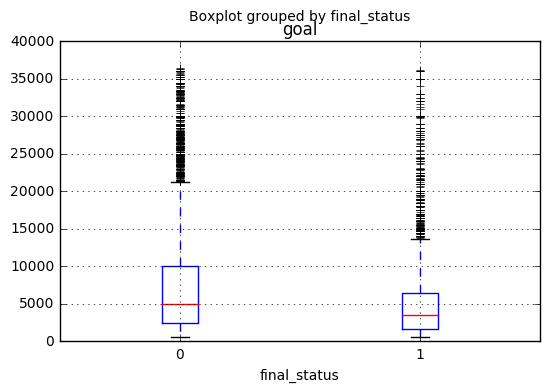

In [61]:
data.boxplot(column='goal', by='final_status')

In [62]:
data_year = data
data_year['year'] = [x.year for x in data['launched_at']]
data_year = data_year.groupby(['year','final_status'],as_index=False)['goal','days_open'].mean()
display(data_year)


year  final_status     goal  days_open
0   2009             0 5145.352     41.281
1   2009             1 3109.896     39.208
2   2010             0 5789.536     39.767
3   2010             1 3986.120     38.070
4   2011             0 6882.346     39.183
5   2011             1 4396.744     36.545
6   2012             0 8024.585     35.197
7   2012             1 4884.909     33.013
8   2013             0 8445.296     33.402
9   2013             1 5331.571     31.696
10  2014             0 9040.969     34.240
11  2014             1 5997.943     31.516
12  2015             0 9154.904     33.551
13  2015             1 5939.771     31.410

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11568aad0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x115abbdd0>], dtype=object)

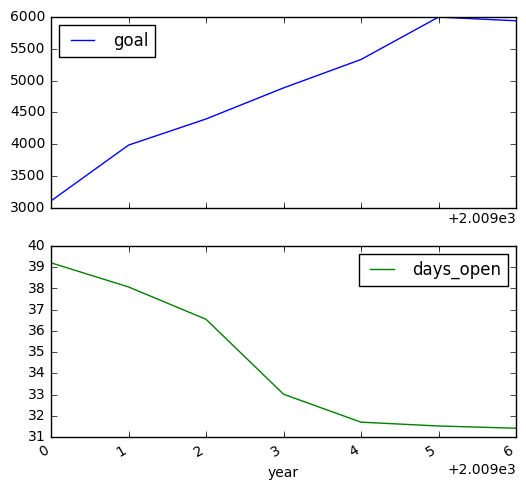

In [65]:
data_year[data_year['final_status'] == 1].drop('final_status', axis=1).plot(x='year', subplots=True, figsize=(6, 6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x115c17210>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x115d3d390>], dtype=object)

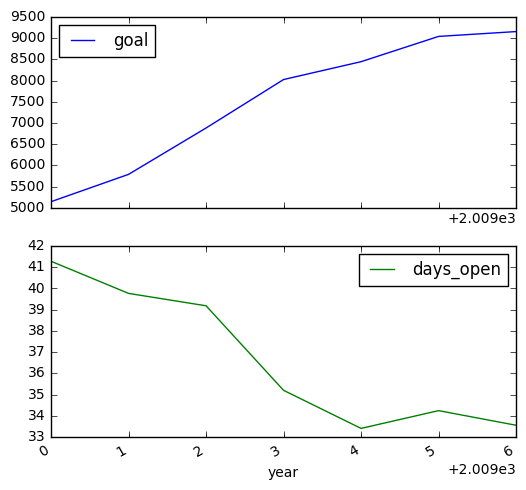

In [66]:
data_year[data_year['final_status'] == 0].drop('final_status', axis=1).plot(x='year', subplots=True, figsize=(6, 6))

- Exploring Days Open variable

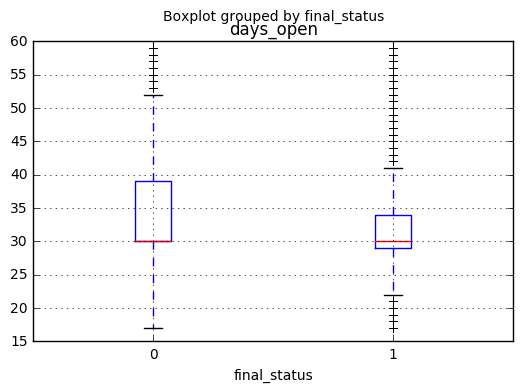

In [4]:
data.boxplot(column='days_open', by='final_status')

#### Categorical Variables

- Country 

final_status_T  final_status_F  rate
country                                      
AU                  206            1030 0.167
CA                  534            2053 0.206
DK                   20              69 0.225
GB                 1294            4455 0.225
IE                   11              62 0.151
NL                   55             414 0.117
NO                   13              45 0.224
NZ                   54             209 0.205
SE                   18              76 0.191
US                20093           46365 0.302

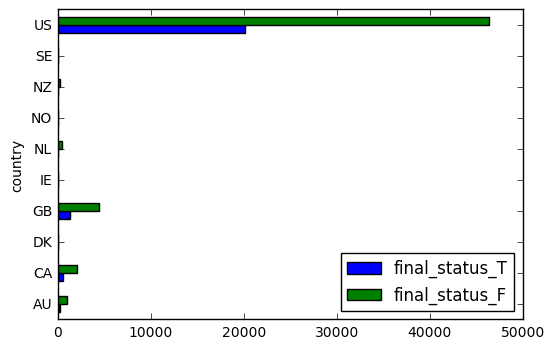

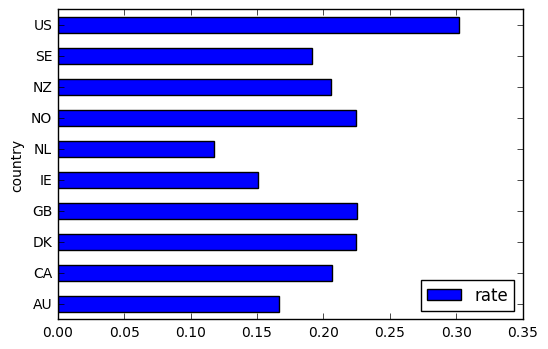

In [121]:
country_data = data
country_data['final_status_T'] = [x for x in country_data['final_status']]
country_data['final_status_F'] = [(x + 1) % 2 for x in country_data['final_status']]
country_data = country_data.groupby(['country'],as_index=True)['final_status_T','final_status_F'].sum()
country_data['rate'] = country_data['final_status_T'] / (country_data['final_status_T'] + country_data['final_status_F'])
country_data.plot.barh(y=['final_status_T', 'final_status_F'])
country_data.plot.barh(y='rate')
display(country_data)

- Currency

final_status_T  final_status_F  rate
currency                                      
AUD                  206            1030 0.167
CAD                  534            2053 0.206
DKK                   20              69 0.225
EUR                   66             476 0.122
GBP                 1294            4455 0.225
NOK                   13              45 0.224
NZD                   54             209 0.205
SEK                   18              76 0.191
USD                20093           46365 0.302

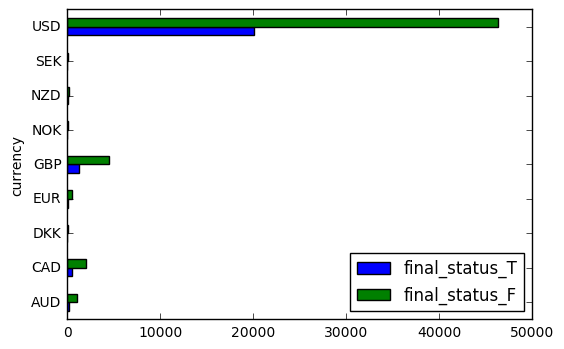

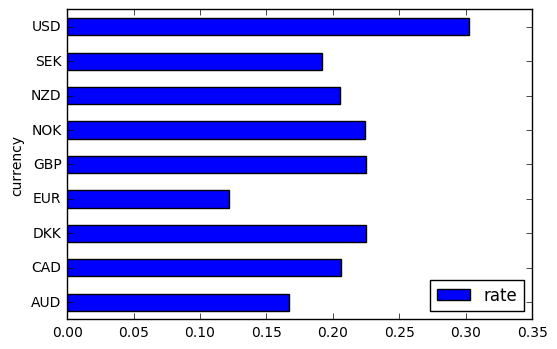

In [123]:
currency_data = data
currency_data['final_status_T'] = [x for x in currency_data['final_status']]
currency_data['final_status_F'] = [(x + 1) % 2 for x in currency_data['final_status']]
currency_data = currency_data.groupby(['currency'],as_index=True)['final_status_T','final_status_F'].sum()
currency_data['rate'] = currency_data['final_status_T'] / (currency_data['final_status_T'] + currency_data['final_status_F'])
currency_data.plot.barh(y=['final_status_T', 'final_status_F'])
currency_data.plot.barh(y='rate')
display(currency_data)

- disable_communication

final_status_T  final_status_F  rate
disable_communication                                      
False                           22298           54612 0.290
True                                0             166 0.000

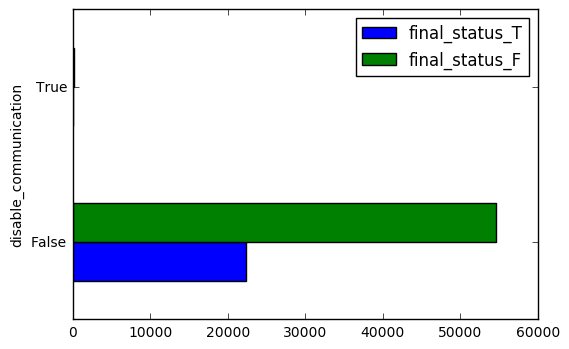

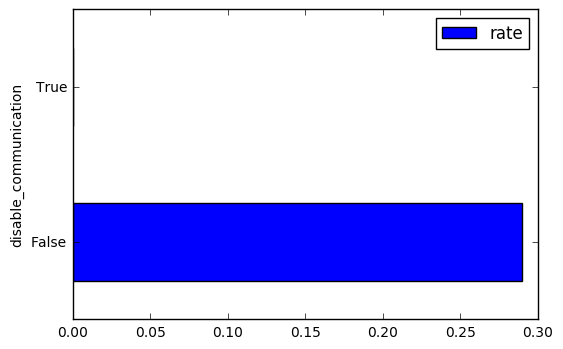

In [125]:
disable_comm_data = data
disable_comm_data['final_status_T'] = [x for x in disable_comm_data['final_status']]
disable_comm_data['final_status_F'] = [(x + 1) % 2 for x in disable_comm_data['final_status']]
disable_comm_data = disable_comm_data.groupby(['disable_communication'],as_index=True)['final_status_T','final_status_F'].sum()
disable_comm_data['rate'] = disable_comm_data['final_status_T'] / (disable_comm_data['final_status_T'] + disable_comm_data['final_status_F'])
disable_comm_data.plot.barh(y=['final_status_T', 'final_status_F'])
disable_comm_data.plot.barh(y='rate')
display(disable_comm_data)

#### Period Variables

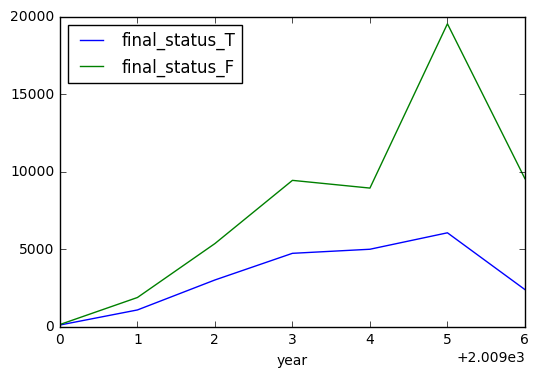

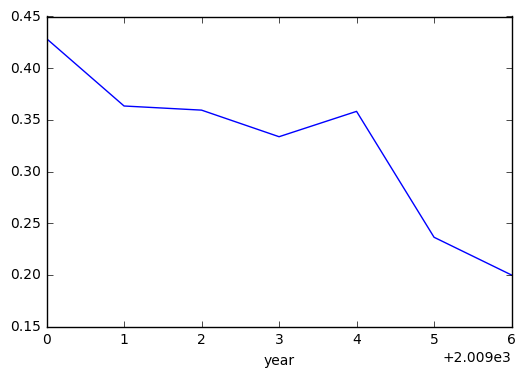

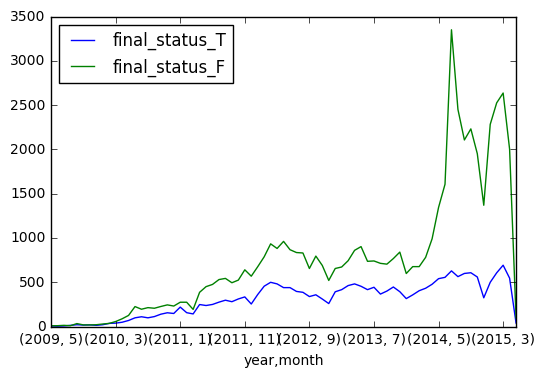

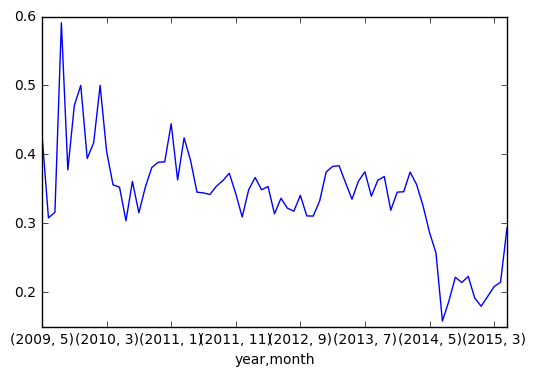

In [140]:
#Success Rate per period
period_data = data
period_data['final_status_T'] = [x for x in period_data['final_status']]
period_data['final_status_F'] = [(x + 1) % 2 for x in period_data['final_status']]
period_data['year'] = [x.year for x in period_data['launched_at']]
period_data['month'] = [x.month for x in period_data['launched_at']]
year_data = period_data.groupby(['year'],as_index=True)['final_status_T','final_status_F'].sum()
year_data.plot()
year_data['rate'] = year_data['final_status_T'] / (year_data['final_status_T'] + year_data['final_status_F'])
plt.figure()
year_data['rate'].plot()

month_data = period_data.groupby(['year','month'],as_index=True)['final_status_T','final_status_F'].sum()
month_data.plot()
month_data['rate'] = month_data['final_status_T'] / (month_data['final_status_T'] + month_data['final_status_F'])
plt.figure()
month_data['rate'].plot()




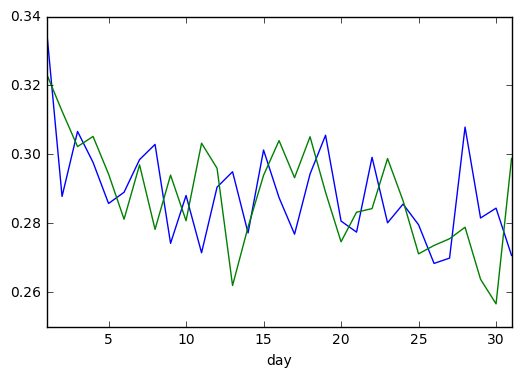

In [150]:
#Success rate for day of month
day_data = period_data
day_data['day'] = [x.day for x in period_data['launched_at']]
day_data = period_data.groupby(['day'],as_index=True)['final_status_T','final_status_F'].sum()
day_data['rate'] = day_data['final_status_T'] / (day_data['final_status_T'] + day_data['final_status_F'])
day_data['rate'].plot()

day_data = period_data
day_data['day'] = [x.day for x in period_data['deadline']]
day_data = period_data.groupby(['day'],as_index=True)['final_status_T','final_status_F'].sum()
day_data['rate'] = day_data['final_status_T'] / (day_data['final_status_T'] + day_data['final_status_F'])
day_data['rate'].plot()


#Noisy, not strong correlation identified



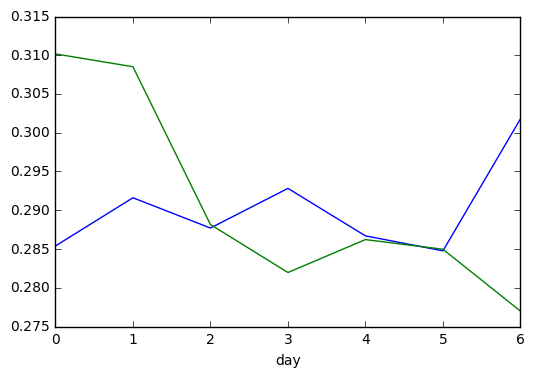

In [149]:
#Success rate for day of week
day_data = period_data
day_data['day'] = [x.weekday() for x in period_data['launched_at']]
day_data = period_data.groupby(['day'],as_index=True)['final_status_T','final_status_F'].sum()
day_data['rate'] = day_data['final_status_T'] / (day_data['final_status_T'] + day_data['final_status_F'])
day_data['rate'].plot()

day_data = period_data
day_data['day'] = [x.weekday() for x in period_data['deadline']]
day_data = period_data.groupby(['day'],as_index=True)['final_status_T','final_status_F'].sum()
day_data['rate'] = day_data['final_status_T'] / (day_data['final_status_T'] + day_data['final_status_F'])
day_data['rate'].plot()

#0 = Monday, 6 = Sunday
#Blue = Launched At, Green = Deadline
#Best for projects launched at sunday with deadline at Monday or Tuesday



#### Textual variables
name, description and keywords

name_len  desc_len  keywords_len
count 77076.000 77076.000     77076.000
mean     53.561   135.484        31.746
std      71.809    81.069        13.685
min       0.000     0.000         1.000
25%      22.000   107.000        20.000
50%      35.000   126.000        31.000
75%      51.000   134.000        45.000
max    1076.000  1268.000       115.000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126ab5e90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x126dc27d0>]], dtype=object)

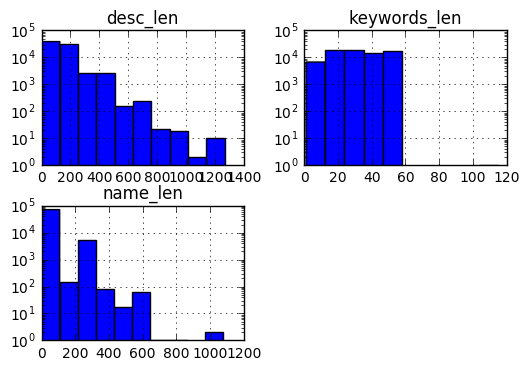

In [184]:
#First, lets analyse the length of the textual variables

text_data = data
text_data['name'] = text_data['name'].fillna('')
text_data['desc'] = text_data['desc'].fillna('')
text_data['keywords'] = text_data['keywords'].fillna('')


text_data['name_len'] = text_data['name'].apply(len)
text_data['desc_len'] = text_data['desc'].apply(len)
text_data['keywords_len'] = text_data['keywords'].apply(len)

display(text_data[['name_len','desc_len','keywords_len']].describe())

text_data[['name_len','desc_len','keywords_len']].hist(log=True)


In [200]:
corpus = list(data['name'])
corpus0 = list(data[data['final_status'] == 0]['name'])
corpus1 = list(data[data['final_status'] == 1]['name'])

tfidf  = TfidfVectorizer(stop_words='english')
tfidf0  = TfidfVectorizer(stop_words='english')
tfidf1  = TfidfVectorizer(stop_words='english')

corpus = np.squeeze(np.asarray(np.sum(tfidf.fit_transform(corpus), axis=0)))
corpus0 = np.squeeze(np.asarray(np.sum(tfidf0.fit_transform(corpus0), axis=0)))
corpus1 = np.squeeze(np.asarray(np.sum(tfidf1.fit_transform(corpus1), axis=0)))

bow = pd.DataFrame(data=corpus, columns=['rel'], index=tfidf.get_feature_names())
bow0 = pd.DataFrame(data=corpus0, columns=['rel0'], index=tfidf0.get_feature_names())
bow1 = pd.DataFrame(data=corpus1, columns=['rel1'], index=tfidf1.get_feature_names())

join = pd.concat([bow, bow0, bow1], axis=1)
join = join.sort('rel1', ascending=[0])
display(join.head(10))


/Users/gustavo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:18: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


rel    rel0    rel1
album   1196.045 741.204 469.266
new      900.298 560.219 352.237
film     768.834 445.001 328.651
project  852.784 617.870 249.407
debut    548.325 332.204 224.251
short    469.968 252.393 219.361
ep       493.354 314.560 186.219
book     629.764 466.109 171.575
music    592.345 431.703 168.974
record   350.055 193.232 159.644

In [202]:
corpus = list(data['desc'])
corpus0 = list(data[data['final_status'] == 0]['desc'])
corpus1 = list(data[data['final_status'] == 1]['desc'])

tfidf  = TfidfVectorizer(stop_words='english')
tfidf0  = TfidfVectorizer(stop_words='english')
tfidf1  = TfidfVectorizer(stop_words='english')

corpus = np.squeeze(np.asarray(np.sum(tfidf.fit_transform(corpus), axis=0)))
corpus0 = np.squeeze(np.asarray(np.sum(tfidf0.fit_transform(corpus0), axis=0)))
corpus1 = np.squeeze(np.asarray(np.sum(tfidf1.fit_transform(corpus1), axis=0)))

bow = pd.DataFrame(data=corpus, columns=['rel'], index=tfidf.get_feature_names())
bow0 = pd.DataFrame(data=corpus0, columns=['rel0'], index=tfidf0.get_feature_names())
bow1 = pd.DataFrame(data=corpus1, columns=['rel1'], index=tfidf1.get_feature_names())

join = pd.concat([bow, bow0, bow1], axis=1)
join = join.sort('rel1', ascending=[0])
display(join.head(10))



/Users/gustavo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:18: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


rel    rel0    rel1
help   1364.462 917.842 458.155
album  1033.002 640.131 395.367
new    1153.798 768.682 395.143
music   908.425 653.434 263.543
film    626.003 388.907 239.199
record  582.001 347.243 235.946
need    683.009 478.984 210.792
world   780.506 577.753 209.461
make    681.996 488.210 200.592
book    743.212 558.724 189.867

In [201]:
corpus = list(data['keywords'])
corpus0 = list(data[data['final_status'] == 0]['keywords'])
corpus1 = list(data[data['final_status'] == 1]['keywords'])

tfidf  = TfidfVectorizer(stop_words='english')
tfidf0  = TfidfVectorizer(stop_words='english')
tfidf1  = TfidfVectorizer(stop_words='english')

corpus = np.squeeze(np.asarray(np.sum(tfidf.fit_transform(corpus), axis=0)))
corpus0 = np.squeeze(np.asarray(np.sum(tfidf0.fit_transform(corpus0), axis=0)))
corpus1 = np.squeeze(np.asarray(np.sum(tfidf1.fit_transform(corpus1), axis=0)))

bow = pd.DataFrame(data=corpus, columns=['rel'], index=tfidf.get_feature_names())
bow0 = pd.DataFrame(data=corpus0, columns=['rel0'], index=tfidf0.get_feature_names())
bow1 = pd.DataFrame(data=corpus1, columns=['rel1'], index=tfidf1.get_feature_names())

join = pd.concat([bow, bow0, bow1], axis=1)
join = join.sort('rel1', ascending=[0])
display(join.head(10))




/Users/gustavo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:18: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


rel    rel0    rel1
album   1125.279 694.092 446.947
new      879.093 546.597 345.538
film     731.715 421.590 315.112
project  796.624 576.866 233.662
debut    534.006 323.058 219.937
short    451.485 240.044 213.166
ep       489.315 313.385 184.012
book     596.353 440.915 163.288
music    562.640 409.154 161.962
help     482.915 333.928 156.931